# CENSO DA EDUCAÇÃO SUPERIOR - 2019

Criado em 09 de novembro de 2021, por Davidson Santana

In [85]:
#bibliotecas utilizadas neste notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from tqdm.notebook import tqdm_notebook
sns.set_theme()

In [2]:
#caminho local para o arquivo contendo os microdados a serem analisados
url = r"D:\ANÁLISE DE DADOS\BASE-DADOS-BRUTOS\CENSO ESCOLAR SUPERIOR\2019\microdados-tratados-2019.csv"

In [3]:
#criação de dataframe, guardado na variável df
dfGeral = pd.read_csv(url, sep=',')

C:\PROJETOS\amb-virtual-analise-dados\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
#exibir as cinco primeiras linhas do dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
dfGeral.head()

,NU_ANO_CENSO,CO_IES,TP_CATEGORIA_ADMINISTRATIVA,CO_CURSO,TP_TURNO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,TP_NIVEL_ACADEMICO,CO_CINE_AREA_GERAL,NO_CINE_AREA_GERAL,CO_CINE_ROTULO,TP_COR_RACA,TP_SEXO,NU_IDADE,TP_NACIONALIDADE,CO_PAIS_ORIGEM,CO_UF_NASCIMENTO,TP_SITUACAO,QT_CARGA_HORARIA_TOTAL,QT_CARGA_HORARIA_INTEG,DT_INGRESSO_CURSO,IN_INGRESSO_VESTIBULAR,IN_INGRESSO_ENEM,IN_INGRESSO_AVALIACAO_SERIADA,IN_INGRESSO_SELECAO_SIMPLIFICA,IN_INGRESSO_OUTRO_TIPO_SELECAO,IN_INGRESSO_VAGA_REMANESC,IN_INGRESSO_DECISAO_JUDICIAL,IN_RESERVA_VAGAS,IN_RESERVA_ETNICO,IN_RESERVA_ENSINO_PUBLICO,IN_RESERVA_RENDA_FAMILIAR,TP_ESCOLA_CONCLUSAO_ENS_MEDIO,TP_MOBILIDADE_ACADEMICA,IN_MATRICULA,IN_CONCLUINTE
0,2019,UNIVERSIDADE FEDERAL DE MATO GROSSO,Pública Federal,1,Noturno,Bacharelado,Presencial,Graduação,4,"Negócios, administração e direito",0421D01,Preta,Feminino,27,Brasileira,BRASIL,Não identificado,Cursando,3700,3700,01JAN2017:00:00:00,Não,Não,Não,0,NaN,0,0,Não,Aluno não possui qualquer tipo de reserva de vagas,Aluno não possui qualquer tipo de reserva de vagas,Aluno não possui qualquer tipo de reserva de vagas,Pública,NaN,1,0
1,2019,UNIVERSIDADE FEDERAL DE MATO GROSSO,Pública Federal,1,Noturno,Bacharelado,Presencial,Graduação,4,"Negócios, administração e direito",0421D01,Parda,Masculino,32,Brasileira,BRASIL,Não identificado,Matrícula trancada,3700,960,01JAN2016:00:00:00,Não,Sim,Não,0,NaN,0,0,Sim,Sim,Sim,Não (Aluno possui outro tipo de reserva de vagas),Pública,NaN,0,0
2,2019,UNIVERSIDADE FEDERAL DE MATO GROSSO,Pública Federal,1,Noturno,Bacharelado,Presencial,Graduação,4,"Negócios, administração e direito",0421D01,Parda,Masculino,31,Brasileira,BRASIL,Não identificado,Cursando,3700,2490,01JAN2012:00:00:00,Não,Sim,Não,0,NaN,0,0,Sim,Não (Aluno possui outro tipo de reserva de vagas),Sim,Não (Aluno possui outro tipo de reserva de vagas),Pública,NaN,1,0
3,2019,UNIVERSIDADE FEDERAL DE MATO GROSSO,Pública Federal,1,Noturno,Bacharelado,Presencial,Graduação,4,"Negócios, administração e direito",0421D01,Preta,Feminino,31,Brasileira,BRASIL,Não identificado,Desvinculado do curso,3700,0,01JAN2015:00:00:00,Não,Sim,Não,0,NaN,0,0,Sim,Sim,Sim,Não (Aluno possui outro tipo de reserva de vagas),Pública,NaN,0,0
4,2019,UNIVERSIDADE FEDERAL DE MATO GROSSO,Pública Federal,1,Noturno,Bacharelado,Presencial,Graduação,4,"Negócios, administração e direito",0421D01,Parda,Masculino,42,Brasileira,BRASIL,Não identificado,Formado,3700,3940,01JAN2013:00:00:00,Não,Sim,Não,0,NaN,0,0,Sim,Sim,Sim,Não (Aluno possui outro tipo de reserva de vagas),Pública,NaN,1,1


In [5]:
#criar lista com os índices de registros de estudantes que não quiseram declarar sua cor/raça
# NaoQuisDeclarar_idx = dfGeral[dfGeral['TP_COR_RACA'] == 'Aluno não quis declarar cor/raça'].index

#criar lista com os índices de registros de estudantes que não foi possível obter informação sobre sua cor/raça
# NaoDispoeInfo_idx = dfGeral[dfGeral['TP_COR_RACA'] =='Não dispõe da informação (Não resposta)'].index

#criar lista com as listas obtidas anteriormente
# eliminados_idx = NaoQuisDeclarar_idx.append(NaoDispoeInfo_idx)

In [6]:
#remover do dataframe original os registros de estudantes que não declararam ou não foi possível obeter sua cor/raça
# df = dfGeral.drop(eliminados_idx)

## Distribuição dos estudantes do ensino superior brasileiro por raça/cor e sexo.

Independete da raça/cor, a presença de pessoas do sexo feminino é maior que de pessoas 
do sexo masculino, entre estudante do ensino superior no Brasil, aponta dados do Censo Escolar da Educação Superior 2019.

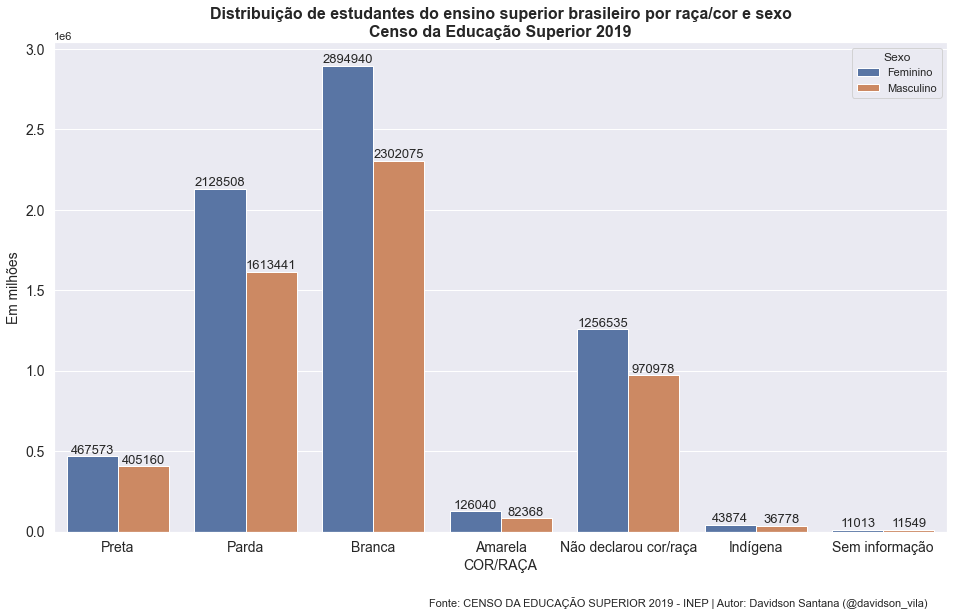

In [7]:
#criar visualização
plt.figure(figsize=(16,9))
ax1 = sns.countplot(x='TP_COR_RACA', hue='TP_SEXO', data=dfGeral)
plt.title('Distribuição de estudantes do ensino superior brasileiro por raça/cor e sexo\nCenso da Educação Superior 2019', 
          fontsize=16, weight='bold')
plt.figtext(0.45, 0.009,'Fonte: CENSO DA EDUCAÇÃO SUPERIOR 2019 - INEP | Autor: Davidson Santana (@davidson_vila)', fontsize=11)
plt.xlabel('COR/RAÇA', fontsize=14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Em milhões', fontsize=14)
plt.legend(title='Sexo')
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d', fontsize=13)
# plt.savefig('./graficos/distr-est-sexo-raca-cor.png', format='png')

## Distribuição de estudantes matriculados no ensino superior brasileiro de acordo com raça/cor.

In [8]:
# função que cria tabela de distribuição de frequências
def TabelaFrequencias(dataframe, coluna):
    variavel, variavel_fn = np.unique(dataframe[coluna], return_counts=True)
    variavel_fr = [round(i, 3) for i in (variavel_fn/variavel_fn.sum())]
    return pd.DataFrame({coluna:variavel, 'fr':variavel_fr})    

Estudantes negros são uma das minorias entre os matriculados em cursos de nível superior. Pessoas negras correspondem a
7,1% das matrículas do ensino superior.

In [9]:
# criar tabela de distribuição de frequências de acordo com a cor/raça dos estudantes matriculados
TabFreqCor = TabelaFrequencias(dataframe=dfGeral, coluna='TP_COR_RACA')

TabFreqCor = TabFreqCor.set_index('TP_COR_RACA', drop=True) #definir como índice do dataframe as categorias de cores.

# exibir tabela de distribuição de frequências
TabFreqCor

,fr
TP_COR_RACA,
Amarela,0.017
Branca,0.421
Indígena,0.007
Não declarou cor/raça,0.180
Parda,0.303
Preta,0.071
Sem informação,0.002


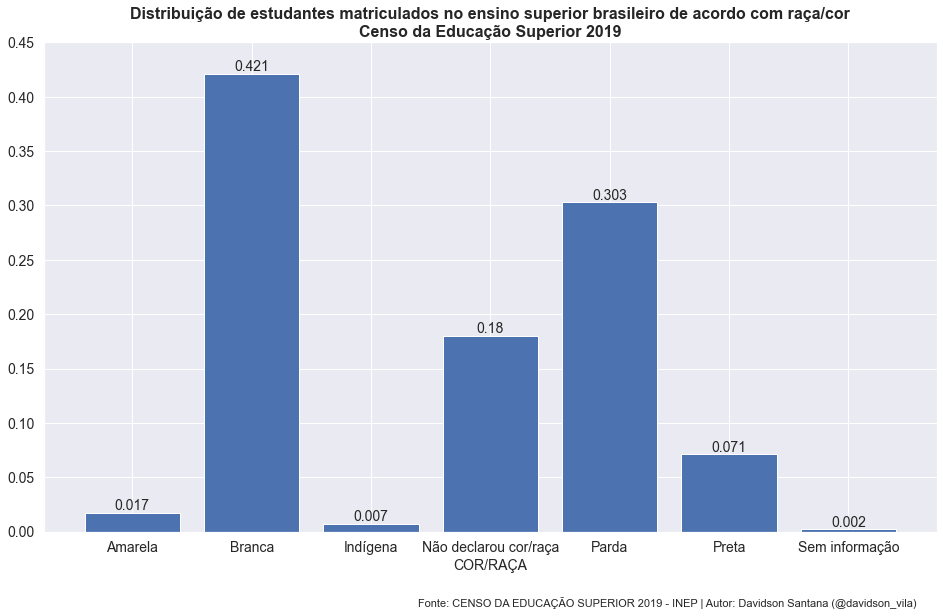

In [10]:
# gerar visualização da tabela de distribuição de frequências, anteriormente apresentada
fig2 = plt.figure(figsize=(16,9))
ax2 = fig2.add_subplot(1,1,1)
ax2.bar(x=TabFreqCor.index.values, height='fr', data=TabFreqCor)
plt.title('Distribuição de estudantes matriculados no ensino superior brasileiro de acordo com raça/cor\nCenso da Educação Superior 2019', 
          fontsize=16, weight='bold')
plt.figtext(0.45, 0.009,'Fonte: CENSO DA EDUCAÇÃO SUPERIOR 2019 - INEP | Autor: Davidson Santana (@davidson_vila)', fontsize=11)
plt.xlabel('COR/RAÇA', fontsize=14)
plt.xticks(rotation='horizontal', fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 0.45, 10)
for container in ax2.containers:
    ax2.bar_label(container, fontsize=14)
# plt.savefig('./graficos/distr-est-raca-cor.png', format='png')
plt.show()

## Distribuição das matrículas de acordo com a área geral de formação do curso

As áreas gerais de formação obecem a  International Standard Classification of Education (Isced), que traduzida o Inep traduziu e publicou como Classificação Internacional Normalizada da Educação (Cine).

A Cine é uma classificação norteadora que ajuda a ordenar programas educacionais e suas certificações. E ela é composta por 11 áreas de conhecimento:

* 00 Programas básicos
* 01 Educação
* 02 Artes e humanidades
* 03 Ciências Sociais, comunicação e informação
* 04 Negócios, administração e direito
* 05 Ciências naturais, matemática e estatística
* 06 Computação e Tecnologias da Informação e Comunicação (TIC)
* 07 Engenharia, produção e construção
* 08 Agricultura, silvicultura, pesca e veterinária
* 09 Saúde e bem-estar
* 10 Serviços

Em todas estas áreas, estudantes negros são minorias. Por outro lado, estudantes declarados brancos são maioria.


In [11]:
dic = {}
for area in np.arange(0, 12):
    raca, raca_fn = np.unique(dfGeral[dfGeral['CO_CINE_AREA_GERAL']==area]['TP_COR_RACA'], return_counts=True)
    lista = [(atributo, round(valor/raca_fn.sum(),3)) for atributo, valor in zip(raca, raca_fn)]
    for dupla in lista:
        if dupla[0] in dic:
            dic[dupla[0]].append(dupla[1])
        else:
            dic[dupla[0]] = [dupla[1]]  

TabAreaCor = pd.DataFrame.from_dict(dic, orient='columns')
TabAreaCor

,Amarela,Branca,Indígena,Não declarou cor/raça,Parda,Preta,Sem informação
0,0.032,0.497,0.012,0.110,0.251,0.097,0.000
1,0.016,0.363,0.009,0.190,0.337,0.083,0.003
2,0.023,0.484,0.004,0.177,0.234,0.074,0.003
3,0.016,0.472,0.007,0.166,0.261,0.075,0.003
4,0.016,0.425,0.005,0.192,0.294,0.066,0.001
5,0.023,0.449,0.005,0.129,0.305,0.085,0.005
6,0.016,0.460,0.005,0.173,0.277,0.067,0.001
7,0.018,0.468,0.005,0.163,0.279,0.064,0.003
8,0.016,0.506,0.005,0.117,0.298,0.058,0.001
9,0.018,0.396,0.008,0.179,0.330,0.069,0.001


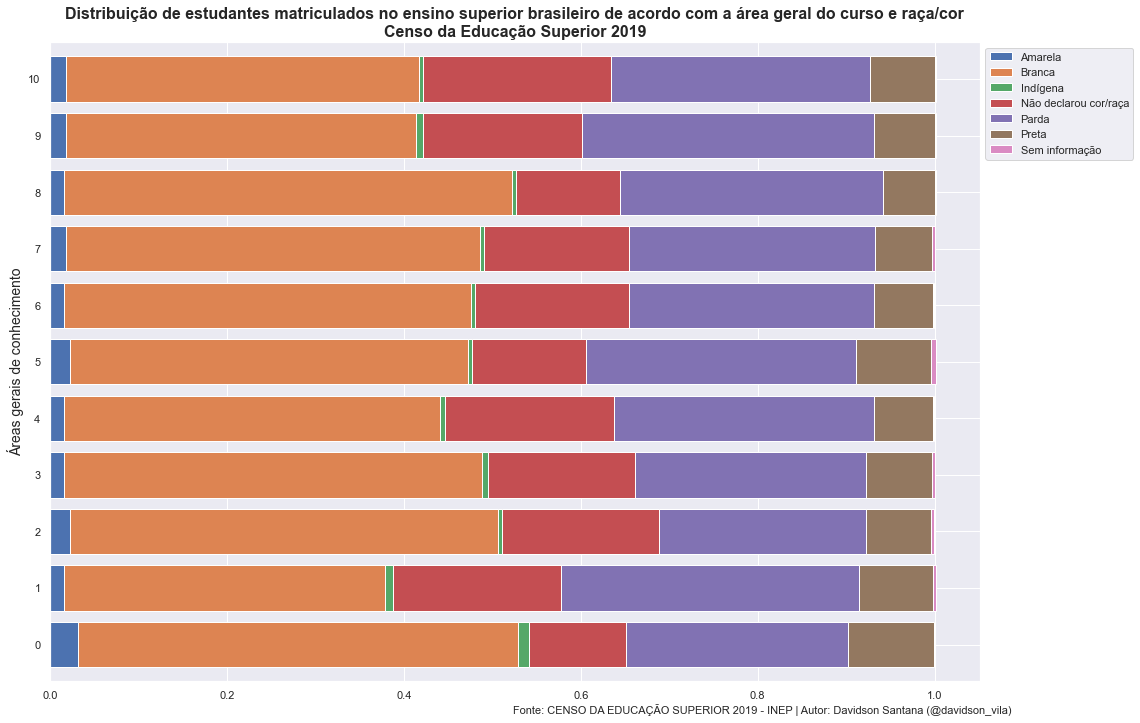

In [12]:
ax4 = TabAreaCor.plot.barh(stacked=True, figsize=(16,10), width=0.8)
plt.legend(bbox_to_anchor=(1.0,1), loc='upper left')
plt.title('Distribuição de estudantes matriculados no ensino superior brasileiro de acordo com a área geral do curso e raça/cor\nCenso da Educação Superior 2019', 
          fontsize=16, weight='bold')

plt.figtext(0.45, 0.0,'Fonte: CENSO DA EDUCAÇÃO SUPERIOR 2019 - INEP | Autor: Davidson Santana (@davidson_vila)', 
            fontsize=11)

plt.xticks(None)

plt.xlabel(None)
plt.ylabel('Áreas gerais de conhecimento', fontsize= 14)

plt.tight_layout()
# plt.savefig('./graficos/distr-est-area-geral-formacao-raca-cor-barras-empilhadas.png', format='png')

## Distribuição das cotas

In [13]:
dfGeral.columns.values

array(['NU_ANO_CENSO', 'CO_IES', 'TP_CATEGORIA_ADMINISTRATIVA',
       'CO_CURSO', 'TP_TURNO', 'TP_GRAU_ACADEMICO',
       'TP_MODALIDADE_ENSINO', 'TP_NIVEL_ACADEMICO', 'CO_CINE_AREA_GERAL',
       'NO_CINE_AREA_GERAL', 'CO_CINE_ROTULO', 'TP_COR_RACA', 'TP_SEXO',
       'NU_IDADE', 'TP_NACIONALIDADE', 'CO_PAIS_ORIGEM',
       'CO_UF_NASCIMENTO', 'TP_SITUACAO', 'QT_CARGA_HORARIA_TOTAL',
       'QT_CARGA_HORARIA_INTEG', 'DT_INGRESSO_CURSO',
       'IN_INGRESSO_VESTIBULAR', 'IN_INGRESSO_ENEM',
       'IN_INGRESSO_AVALIACAO_SERIADA', 'IN_INGRESSO_SELECAO_SIMPLIFICA',
       'IN_INGRESSO_OUTRO_TIPO_SELECAO', 'IN_INGRESSO_VAGA_REMANESC',
       'IN_INGRESSO_DECISAO_JUDICIAL', 'IN_RESERVA_VAGAS',
       'IN_RESERVA_ETNICO', 'IN_RESERVA_ENSINO_PUBLICO',
       'IN_RESERVA_RENDA_FAMILIAR', 'TP_ESCOLA_CONCLUSAO_ENS_MEDIO',
       'TP_MOBILIDADE_ACADEMICA', 'IN_MATRICULA', 'IN_CONCLUINTE'],
      dtype=object)

Levando-se me consideração todas as modalidades de cotas ofertadas, para ingresso em cursos de graduação
os estudantes pardos são os mais beneficiados, seguidos pelos de cor branca e, em terceiro lugar, os de cor negra.

In [174]:
dfReservas = dfGeral['IN_RESERVA_VAGAS'].groupby([dfGeral['IN_RESERVA_VAGAS'], dfGeral['TP_COR_RACA']]).count()

In [175]:
dfReservas.unstack()

TP_COR_RACA,Amarela,Branca,Indígena,Não declarou cor/raça,Parda,Preta,Sem informação
IN_RESERVA_VAGAS,,,,,,,
Não,201774,5006367,72698,2190947,3411040,754148,20615
Sim,6634,190648,7954,36566,330909,118585,1947


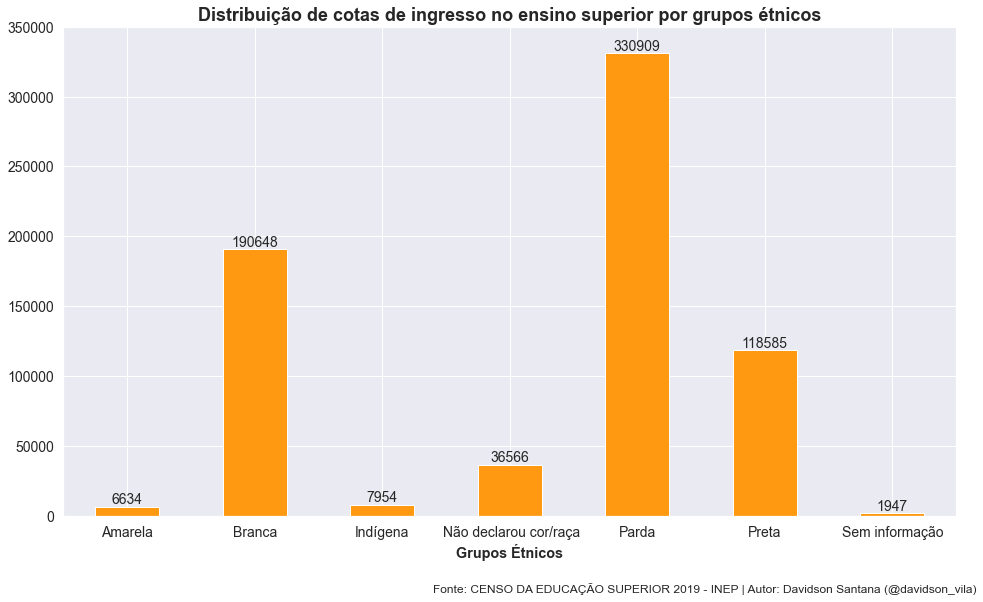

In [186]:
ax5 = dfReservas['Sim'].plot.bar(figsize=(16,9), grid=True, fontsize=14, color=(255/255,153/255,18/255))
ax5.set_anchor('N')
ax5.set_title('Distribuição de cotas de ingresso no ensino superior por grupos étnicos', 
              fontsize=18, weight='bold')
ax5.text(2.4, -55000, 'Fonte: CENSO DA EDUCAÇÃO SUPERIOR 2019 - INEP | Autor: Davidson Santana (@davidson_vila)')

ax5.set_xlabel('Grupos Étnicos', fontsize='large', fontweight='bold') 
ax5.set_xticklabels(['Amarela', 'Branca', 'Indígena',str(' Não declarou cor/raça'), 'Parda', 'Preta', 'Sem informação'],
                   rotation=0)
ax5.set_ybound(0, 350000)

for container in ax5.containers:
    ax5.bar_label(container, fontsize=14)
plt.savefig('./graficos/distr-cotas-raca-cor-barras.png', format='png')